# The Spam Detector 

##   Load, clean and prepare the data

### import librairies

In [1]:
#import nltk
#nltk.download() #downloads nltk

In [1]:
from nltk.tokenize import sent_tokenize, word_tokenize
import numpy as np
import pandas as pd
import nltk 

### explorating Data

In [2]:
df = pd.read_csv('SMSSpamCollection.txt', sep = '\t',header = None)
print(df)

         0                                                  1
0      ham  Go until jurong point, crazy.. Available only ...
1      ham                      Ok lar... Joking wif u oni...
2     spam  Free entry in 2 a wkly comp to win FA Cup fina...
3      ham  U dun say so early hor... U c already then say...
4      ham  Nah I don't think he goes to usf, he lives aro...
...    ...                                                ...
5567  spam  This is the 2nd time we have tried 2 contact u...
5568   ham               Will ü b going to esplanade fr home?
5569   ham  Pity, * was in mood for that. So...any other s...
5570   ham  The guy did some bitching but I acted like i'd...
5571   ham                         Rofl. Its true to its name

[5572 rows x 2 columns]


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5572 entries, 0 to 5571
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   0       5572 non-null   object
 1   1       5572 non-null   object
dtypes: object(2)
memory usage: 87.2+ KB


In [4]:
df.head()

,0,1
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


In [5]:
targets = np.array(df[0])
targets

array(['ham', 'ham', 'spam', ..., 'ham', 'ham', 'ham'], dtype=object)

### transform targets on booleens 

In [6]:
targets1 = np.array([1 if x == "ham" else 0 for x in targets])
targets1

array([1, 1, 0, ..., 1, 1, 1])

### Vectoriser le corpus et extraire le stop words

In [7]:
from sklearn.feature_extraction.text import CountVectorizer

stopwords = nltk.corpus.stopwords.words("english")
vectorizer = CountVectorizer(stop_words = stopwords)
corpus = df[1]
X = vectorizer.fit_transform(corpus)
df_vector = pd.DataFrame(X.toarray(), columns = vectorizer.get_feature_names())
#df_vector
X.shape

(5572, 8577)

In [8]:
vectorizer.get_feature_names()

['00',
 '000',
 '000pes',
 '008704050406',
 '0089',
 '0121',
 '01223585236',
 '01223585334',
 '0125698789',
 '02',
 '0207',
 '02072069400',
 '02073162414',
 '02085076972',
 '021',
 '03',
 '04',
 '0430',
 '05',
 '050703',
 '0578',
 '06',
 '07',
 '07008009200',
 '07046744435',
 '07090201529',
 '07090298926',
 '07099833605',
 '07123456789',
 '0721072',
 '07732584351',
 '07734396839',
 '07742676969',
 '07753741225',
 '0776xxxxxxx',
 '07781482378',
 '07786200117',
 '077xxx',
 '078',
 '07801543489',
 '07808',
 '07808247860',
 '07808726822',
 '07815296484',
 '07821230901',
 '078498',
 '07880867867',
 '0789xxxxxxx',
 '07946746291',
 '0796xxxxxx',
 '07973788240',
 '07xxxxxxxxx',
 '08',
 '0800',
 '08000407165',
 '08000776320',
 '08000839402',
 '08000930705',
 '08000938767',
 '08001950382',
 '08002888812',
 '08002986030',
 '08002986906',
 '08002988890',
 '08006344447',
 '0808',
 '08081263000',
 '08081560665',
 '0825',
 '083',
 '0844',
 '08448350055',
 '08448714184',
 '0845',
 '08450542832',
 '084

### Calcul du TF-IDF

In [9]:
from sklearn.feature_extraction.text import TfidfVectorizer 
vectorizer = TfidfVectorizer(min_df=1)
X = vectorizer.fit_transform(corpus) 
idf = vectorizer._tfidf.idf_ 
idf1 = pd.DataFrame(X.toarray())
print(len(idf1))

5572


### Faire la somme des repetitions de chaque mot sur tout le document

In [10]:
S = df_vector.sum()
df1 = pd.concat([S], axis = 1)
df1.columns = ["sum_val"]

In [11]:
Tab_Sum = df1.sort_values(by = 'sum_val', ascending = False)
print(Tab_Sum)

          sum_val
call          593
get           391
ur            391
gt            318
lt            316
...           ...
havbeen         1
hava            1
hav2hear        1
haunt           1
〨ud             1

[8577 rows x 1 columns]


### Afficher les 10 mots les plus répétés 

In [12]:
Tab_Sum[:10]

,sum_val
call,593
get,391
ur,391
gt,318
lt,316
ok,293
free,284
go,283
know,262
good,247


### Affiche les 10 mots les moins répétés 

In [13]:
Tab_Sum[-10:]

,sum_val
haul,1
hcl,1
havn,1
haventcn,1
havebeen,1
havbeen,1
hava,1
hav2hear,1
haunt,1
〨ud,1


## Apprentissage

La Regression Logistique 

In [20]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression

X_train, X_test, y_train, y_test = train_test_split(df_vector.values, targets1, test_size = 0.20, random_state = 42)
logReg = LogisticRegression()

logReg.fit(X_train, y_train)
y_predict= logReg.predict(X_test)

score1 = logReg.score(X_test, y_test)

print('score Regression logistique =', round(score, 4))

score Regression logistique = 0.9857


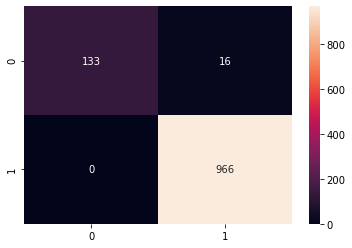

In [21]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
cm = confusion_matrix(y_test, y_predict)
sns.heatmap(cm, annot=True, fmt="d")

In [22]:
from sklearn.metrics import classification_report
print(classification_report(y_test, y_predict))

              precision    recall  f1-score   support

           0       1.00      0.89      0.94       149
           1       0.98      1.00      0.99       966

    accuracy                           0.99      1115
   macro avg       0.99      0.95      0.97      1115
weighted avg       0.99      0.99      0.99      1115



F1 est une moyenne pondérée de la précision et du rappel:
F1 = 2 * (precision * recall) / (precision + recall)

les SVM 

In [23]:
from sklearn import svm 
X_train, X_test, y_train, y_test = train_test_split(df_vector.values, targets1, test_size = 0.20, random_state = 42)
clf = svm.SVC(kernel='linear', C=1).fit(X_train, y_train)
score2 = clf.score(X_test, y_test)
print('score SVM =', round(score, 4))

score SVM = 0.9857


### Cross validation

In [35]:
from sklearn.model_selection import ShuffleSplit

In [38]:
cv = ShuffleSplit(n_splits=10, test_size= 0.2, random_state= 42)
for train_index, test_index in cv.split(X):
    print("TRAIN:", train_index, "TEST:", test_index) # show index of train set and test set 

TRAIN: [1978 3989 3935 ... 5226 5390  860] TEST: [3245  944 1044 ... 5556 4205 4293]
TRAIN: [1809 4249  448 ... 5215 3867 2077] TEST: [1086  483  855 ... 3609 3902 1851]
TRAIN: [1688 2618 2319 ...   53 1245 3166] TEST: [ 577 2279 4517 ... 2743 4177 4220]
TRAIN: [  45 2349 4972 ...   98 3693 5304] TEST: [1806 3752 1197 ... 1429 3212 5036]
TRAIN: [4670 3060 3614 ... 2703 5187 2965] TEST: [5528 4971  101 ... 3840 4116 1361]
TRAIN: [3405 4049 1920 ... 3744 4035 4388] TEST: [5162  590 5271 ... 4270 2171  385]
TRAIN: [4541 3491 2231 ... 1486 5147  735] TEST: [ 109 5022 2073 ... 3795 1402 4564]
TRAIN: [ 913 4596 3065 ... 4249   67 4495] TEST: [3572 3423 1340 ... 3964 2446 3145]
TRAIN: [ 323 3821  314 ... 2621 4007 2709] TEST: [2528  859  624 ... 4503 2103 4580]
TRAIN: [4218 1896 2868 ... 2892 2458 1741] TEST: [4311 2415 4077 ... 2195 5285 4081]


In [41]:
from sklearn.model_selection import cross_val_score
clf = svm.SVC(kernel='linear', C=1)
scores = cross_val_score(clf, X, targets1, cv=5)
print('les scores de la Cross Validation =', scores)

les scores de la Cross Validation = [0.98116592 0.98565022 0.98025135 0.98114901 0.98204668]


In [40]:
score_CV = np.mean(scores)
print('les score moyen de la Cross Validation est=', round(score_CV, 4))

les score moyen de la Cross Validation est= 0.9821


### Train

In [35]:
from sklearn.metrics import f1_score
score_spam = f1_score(y_test, y_predict, pos_label=0)
score_ham = f1_score(y_test, y_predict)
print('score_spam=', score_spam,'score_ham=', score_ham)

score_spam= 0.9432624113475176 score_ham= 0.9917864476386037
